# Loan Data Exploration

What factors affect a loan’s outcome status?


What affects the borrower’s APR or interest rate?


Are there differences between loans depending on how large the original loan amount was?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_csv('prosperLoanData.csv')

## Data Assessing

### Visual Assessment

In [4]:
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.1400,9425.00,1971.1400,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.6300,3001.00,1185.6300,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.2000,4091.09,1052.1100,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.0906

In [5]:
df.head(3)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.0,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,0.0796,0.0249,0.0547,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.275,0.240,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.0,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41


In [6]:
df.tail(3)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,0.18828,0.1025,0.08578,3.0,D,3.0,1,TX,Other,Employed,84.0,True,False,NaN,2013-12-13 05:49:15,700.0,719.0,2002-02-25 00:00:00,12.0,12.0,25.0,9,521.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,22147.0,0.73,7853.0,25.0,1.00,0.0,0.51,"$25,000-49,999",True,2875.000000,DD1A370200396006300ACA0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,3,123122,10000,2013-12-23 00:00:00,Q4 2013,0FE0370029359765342FDB5,273.35,546.7000,183.15,363.5500,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,0.24450,0.0850,0.15950,4.0,C,5.0,2,GA,Food Service,Full-time,94.0,True,False,NaN,2011-11-14 13:18:24,680.0,699.0,1993-12-01 00:00:00,11.0,11.0,22.0,7,488.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,11956.0,0.69,4137.0,19.0,0.80,1.0,0.48,"$25,000-49,999",True,3875.000000,589536350469116027ED11B,1.0,16.0,16.0,0.0,0.0,5000.0,3264.37,-4.0,0,NaN,28,56401,15000,2011-11-21 00:00:00,Q4 2011,A33834861822272782621C8,449.55,21122.5600,15000.00,6122.5600,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274
113936,E6ED3600409833199F711B7,1140093,2014-01-15 09:27:37.657000000,NaN,36,Current,NaN,0.13189,0.1039,0.0939,0.09071,0.0299,0.06081,6.0,A,7.0,1,NY,Professor,Employed,244.0,False,False,NaN,2014-01-15 09:27:40,680.0,699.0,1995-01-01 00:00:00,10.0,9.0,44.0,8,289.0,0.0,1.0,1.0,257.0,3.0,1.0,0.0,6166.0,0.80,675.0,36.0,0.75,0.0,0.23,"$50,000-74,999",True,4583.333333,00AF3704550953269A64E40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2,127508,2000,2014-01-21 00:00:00,Q1 2014,CE1E3704648000761C9F724,64.90,64.3307,47.25,17.0807,-1.70,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


### Programmatic Assessment

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [8]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [9]:
# Check columns that can be turned into categorical variables
for i in list(df):
    print(i, df[i].nunique())    

ListingKey 113066
ListingNumber 113066
ListingCreationDate 113064
CreditGrade 8
Term 3
LoanStatus 12
ClosedDate 2802
BorrowerAPR 6677
BorrowerRate 2294
LenderYield 2283
EstimatedEffectiveYield 1582
EstimatedLoss 120
EstimatedReturn 1476
ProsperRating (numeric) 7
ProsperRating (Alpha) 7
ProsperScore 11
ListingCategory (numeric) 21
BorrowerState 51
Occupation 67
EmploymentStatus 8
EmploymentStatusDuration 605
IsBorrowerHomeowner 2
CurrentlyInGroup 2
GroupKey 706
DateCreditPulled 112992
CreditScoreRangeLower 26
CreditScoreRangeUpper 26
FirstRecordedCreditLine 11585
CurrentCreditLines 54
OpenCreditLines 52
TotalCreditLinespast7years 118
OpenRevolvingAccounts 48
OpenRevolvingMonthlyPayment 2834
InquiriesLast6Months 50
TotalInquiries 102
CurrentDelinquencies 47
AmountDelinquent 7059
DelinquenciesLast7Years 100
PublicRecordsLast10Years 25
PublicRecordsLast12Months 7
RevolvingCreditBalance 38555
BankcardUtilization 201
AvailableBankcardCredit 31829
TotalTrades 108
TradesNeverDelinquent (percen

In [10]:
df['IncomeRange'].unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

In [11]:
df['CreditGrade'].unique()

array(['C', nan, 'HR', 'AA', 'D', 'B', 'E', 'A', 'NC'], dtype=object)

In [12]:
df['Term'].unique()

array([36, 60, 12], dtype=int64)

In [13]:
df['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [14]:
df['ProsperRating (Alpha)'].unique()

array([nan, 'A', 'D', 'B', 'E', 'C', 'AA', 'HR'], dtype=object)

In [15]:
df['ListingCategory (numeric)'].unique()

array([ 0,  2, 16,  1,  7, 13,  6, 15, 20, 19,  3, 18,  8,  4, 11, 14,  5,
        9, 17, 10, 12], dtype=int64)

## Data Cleaning

In [16]:
# change numeric of ListingCategory to text data 
for i in range(len(df)):
    if df['ListingCategory (numeric)'].iloc[i] == 0:
        df['ListingCategory (numeric)'].iloc[i] = 'Not Available'
    elif df['ListingCategory (numeric)'].iloc[i] == 1:
        df['ListingCategory (numeric)'].iloc[i] = 'Debt Consolidation'
    elif df['ListingCategory (numeric)'].iloc[i] == 2:
        df['ListingCategory (numeric)'].iloc[i] = 'Home Improvement'
    elif df['ListingCategory (numeric)'].iloc[i] == 3:
        df['ListingCategory (numeric)'].iloc[i] = 'Business'
    elif df['ListingCategory (numeric)'].iloc[i] == 4:
        df['ListingCategory (numeric)'].iloc[i] = 'Personal Loan'
    elif df['ListingCategory (numeric)'].iloc[i] == 5:
        df['ListingCategory (numeric)'].iloc[i] = 'Student Use'
    elif df['ListingCategory (numeric)'].iloc[i] == 6:
        df['ListingCategory (numeric)'].iloc[i] = 'Auto'
    elif df['ListingCategory (numeric)'].iloc[i] == 7:
        df['ListingCategory (numeric)'].iloc[i] = 'Other'
    elif df['ListingCategory (numeric)'].iloc[i] == 8:
        df['ListingCategory (numeric)'].iloc[i] = 'Baby&Adoption'
    elif df['ListingCategory (numeric)'].iloc[i] == 9:
        df['ListingCategory (numeric)'].iloc[i] = 'Boat'
    elif df['ListingCategory (numeric)'].iloc[i] == 10:
        df['ListingCategory (numeric)'].iloc[i] = 'Cosmetic Procedure'
    elif df['ListingCategory (numeric)'].iloc[i] == 11:
        df['ListingCategory (numeric)'].iloc[i] = 'Engagement Ring'
    elif df['ListingCategory (numeric)'].iloc[i] == 12:
        df['ListingCategory (numeric)'].iloc[i] = 'Green Loans'
    elif df['ListingCategory (numeric)'].iloc[i] == 13:
        df['ListingCategory (numeric)'].iloc[i] = 'Household Expenses'
    elif df['ListingCategory (numeric)'].iloc[i] == 14:
        df['ListingCategory (numeric)'].iloc[i] = 'Large Purchases'
    elif df['ListingCategory (numeric)'].iloc[i] == 15:
        df['ListingCategory (numeric)'].iloc[i] = 'Medical/Dental'
    elif df['ListingCategory (numeric)'].iloc[i] == 16:
        df['ListingCategory (numeric)'].iloc[i] = 'Motorcycle'
    elif df['ListingCategory (numeric)'].iloc[i] == 17:
        df['ListingCategory (numeric)'].iloc[i] = 'RV'
    elif df['ListingCategory (numeric)'].iloc[i] == 18:
        df['ListingCategory (numeric)'].iloc[i] = 'Taxes'
    elif df['ListingCategory (numeric)'].iloc[i] == 19:
        df['ListingCategory (numeric)'].iloc[i] = 'Vacation'
    elif df['ListingCategory (numeric)'].iloc[i] == 20:
        df['ListingCategory (numeric)'].iloc[i] = 'Wedding Loans'
        

C:\Users\minsung_kim\AppData\Local\Continuum\anaconda3\envs\py38\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [17]:
# convert ListingKey, ListingCategory (numeric) into categorical types
df['ListingKey'] = df['ListingKey'].astype('category')
df['ListingCategory (numeric)'] = df['ListingCategory (numeric)'].astype('category')

In [18]:
# convert IncomeRange, CreditGrade, LoanStatus, and  ListingCategory (numeric) into ordered categorical types
ordinal_var = {'IncomeRange': ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0', 'Not employed', 'Not displayed'],
                'CreditGrade': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC', 'nan'],
                'LoanStatus':['Current', 'Completed', 'FinalPaymentInProgress', 'Chargedoff', 'Defaulted',
                              'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)',
                              'Cancelled','Past Due (61-90 days)', 'Past Due (91-120 days)','Past Due (>120 days)'],
                'ProsperRating (Alpha)': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC', 'nan'],}

for j in ordinal_var:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var[j])
    df[j] = df[j].astype(ordered_var)

In [19]:
# Remove - in the Occupation column
df['Occupation'] = df['Occupation'].str.split(' - ').str[0]

In [20]:
df_copy = df.copy()

In [21]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   ListingKey                           113937 non-null  category
 1   ListingNumber                        113937 non-null  int64   
 2   ListingCreationDate                  113937 non-null  object  
 3   CreditGrade                          28953 non-null   category
 4   Term                                 113937 non-null  int64   
 5   LoanStatus                           113937 non-null  category
 6   ClosedDate                           55089 non-null   object  
 7   BorrowerAPR                          113912 non-null  float64 
 8   BorrowerRate                         113937 non-null  float64 
 9   LenderYield                          113937 non-null  float64 
 10  EstimatedEffectiveYield              84853 non-null   float64 
 11  

### Data Structure

This data set (`prosperLoanData.csv`) has 113937 rows and 81 columns (`BorrowerRate, Occupation, Borrower State.. etc`) on each loan.

### Main features of interest in the dataset

I want to investigate what factors are best for predicting
- **Features that affect loan outcome** 
- **Features that affect interest rate.**
- **Why people borrow money depending on their occupation** 

### Features that help to support my investigation into my features of interest

As for the first question, I think that `CreditGrade` and `IncomeRange` have the greatest impact on loan outcomes. For the second question, I believe that interest rate is associated with whether the borrower has a house (`IsBorrowerHomeowner`). For the last question, I expect most people borrow money because of their studies.

`CreditGrade	Term	LoanStatus`
`BorrowerRate	LenderYield	EstimatedEffectiveYield	 EstimatedLoss	EstimatedReturn`
`ProsperRating (Alpha) ListingCategory (numeric)`
`Occupation	EmploymentStatus	EmploymentStatusDuration	IsBorrowerHomeowner`
`DebtToIncomeRatio	IncomeRange	IncomeVerifiable	StatedMonthlyIncome`
`MonthlyLoanPayment Investors LoanOriginalAmount LoanOriginationDate`

## Univariate Exploration
I'll start with the distribution of loan amount.

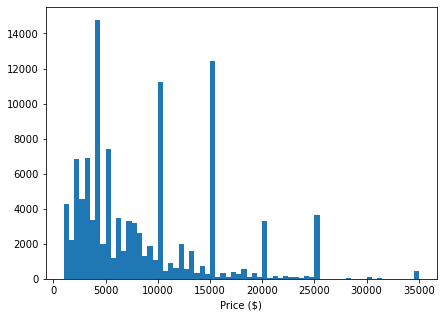

In [22]:
bins =  np.arange(df['LoanOriginalAmount'].min(), df['LoanOriginalAmount'].max() + 500, 500)
plt.figure(figsize=[7, 5])
plt.hist(df['LoanOriginalAmount'], bins=bins);
plt.xlabel('Price ($)')
plt.show()

There is a pattern in the bar char of loan amount. Many loans are the amount of multiples of 5,000 (5000, 10000, 15000, 20000.. etc)


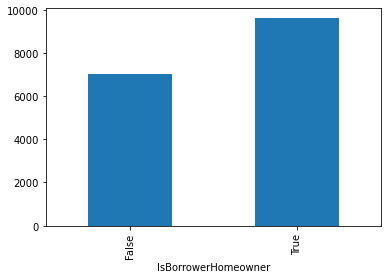

In [23]:
df.groupby(['IsBorrowerHomeowner'])['LoanOriginalAmount'].mean().plot.bar()

This bar chart clearly shows that homeonwers have higher loans

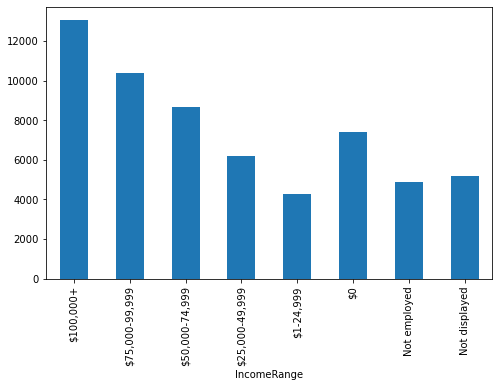

In [50]:
# let's check loan amount by income range
df.groupby(['IncomeRange'])['LoanOriginalAmount'].mean().plot.bar(figsize=(8,5))

The bar chart shows an interesting fact. Over `IncomeRange` of \\$50,000 the higher the income, the higher the loan.However, below  \\$50,000 this pattern breaks. People without income got higher loan than low income ( \\$1 -  \\$49,999). Furthermore,  \\$1- \\$24,999 group got even lower loans than unemployed group and not displayed group.

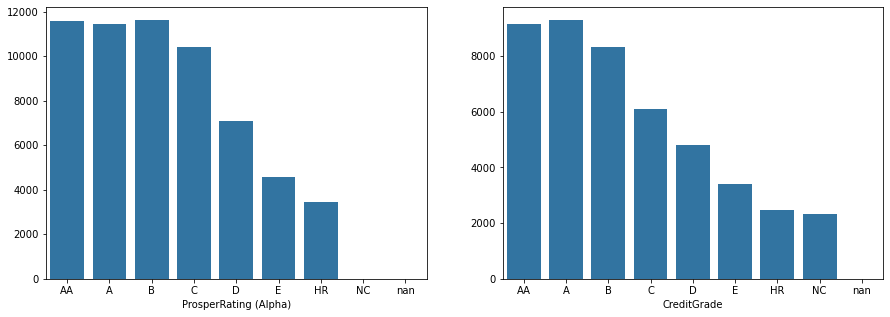

In [42]:
# CreditGrade, 'ProsperRating (Alpha) distribution loan amount

fig, ax = plt.subplots(ncols=2, figsize = [15,5])

default_color = sns.color_palette()[0]
sns.barplot(x = df.groupby(['ProsperRating (Alpha)'])['LoanOriginalAmount'].mean().sort_values(ascending=False).index,
              y = df.groupby(['ProsperRating (Alpha)'])['LoanOriginalAmount'].mean().sort_values(ascending=False).values,
             color = default_color, ax = ax[0])
sns.barplot(x = df.groupby(['CreditGrade'])['LoanOriginalAmount'].mean().sort_values(ascending=False).index,
            y = df.groupby(['CreditGrade'])['LoanOriginalAmount'].mean().sort_values(ascending=False).values,
             color = default_color, ax = ax[1])
plt.show()

Over Grade B(prosper Rating), the loan amount is not so different. Grade B - 

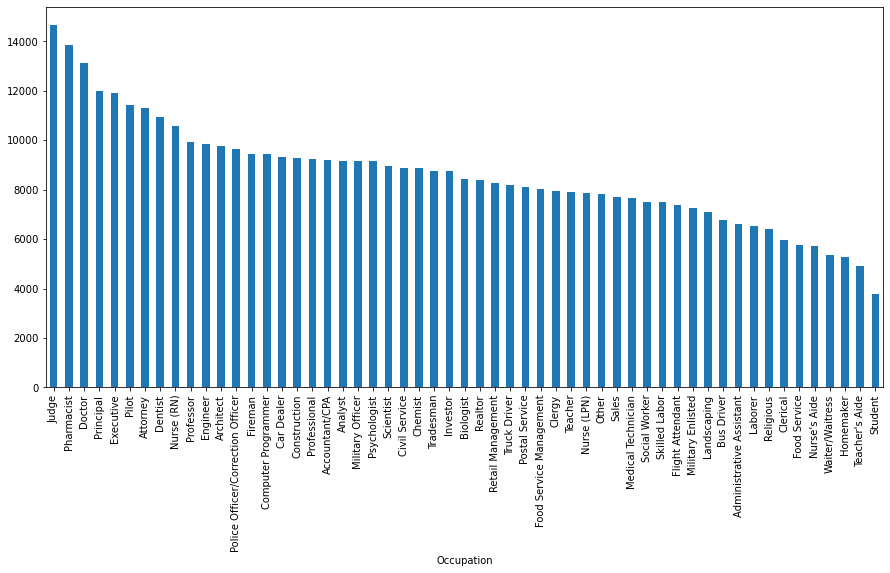

In [51]:
# let's check loan amount by occupation
df.groupby(['Occupation'])['LoanOriginalAmount'].mean().sort_values(ascending=False).plot.bar(figsize=(15,7))

The groupped-by bar chart by job shows that judge, pharmacist, doctors got higher loans (Top 3) and student gets the particularly low loan, which is almost 1/3 of judege's.

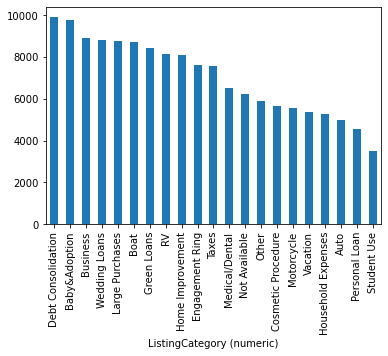

In [125]:
df.groupby(['ListingCategory (numeric)'])['LoanOriginalAmount'].mean().sort_values(ascending=False).plot.bar()

put aside debt consolidation, baby adoption, business wedding top 3 - Student use the lowest. suprising. even vacation.

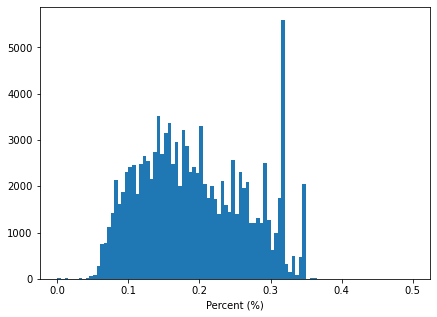

In [46]:
bins =  np.arange(df['BorrowerRate'].min(), df['BorrowerRate'].max() + 0.005, 0.005)
plt.figure(figsize=[7, 5])
plt.hist(df['BorrowerRate'], bins=bins);
plt.xlabel('Percent (%)')
plt.show()

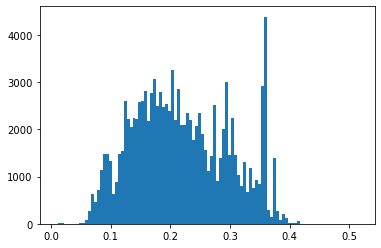

In [55]:
bins =  np.arange(df['BorrowerAPR'].min(), df['BorrowerAPR'].max() + 0.005, 0.005)
plt.hist(df['BorrowerAPR'], bins=bins);

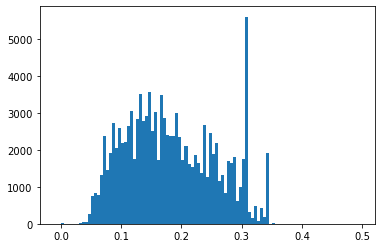

In [90]:
bins =  np.arange(df['LenderYield'].min(), df['LenderYield'].max() + 0.005, 0.005)
plt.hist(df['LenderYield'], bins=bins);

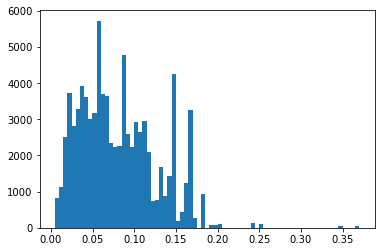

In [91]:
bins =  np.arange(df['EstimatedLoss'].min(), df['EstimatedLoss'].max() + 0.005, 0.005)
plt.hist(df['EstimatedLoss'], bins=bins);

In [96]:
df.iloc[df['EstimatedLoss'].idxmax()].head(50)

ListingKey                                  32543499181220496DBB555
ListingNumber                                                483095
ListingCreationDate                   2010-11-05 14:46:00.163000000
CreditGrade                                                     NaN
Term                                                             36
LoanStatus                                                Completed
ClosedDate                                      2011-04-21 00:00:00
BorrowerAPR                                                 0.36783
BorrowerRate                                                 0.3269
LenderYield                                                  0.3169
EstimatedEffectiveYield                                     -0.0677
EstimatedLoss                                                 0.366
EstimatedReturn                                             -0.0677
ProsperRating (numeric)                                           1
ProsperRating (Alpha)                           

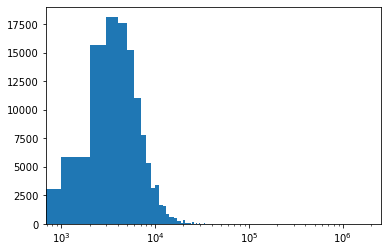

In [107]:
bins =  np.arange(df['StatedMonthlyIncome'].min(), df['StatedMonthlyIncome'].max() + 1000, 1000)
plt.hist(df['StatedMonthlyIncome'], bins=bins);
plt.xscale('log')

In [108]:
df['StatedMonthlyIncome'].max()

1750002.916667

In [111]:
df.iloc[df['StatedMonthlyIncome'].idxmax()].head(50)

ListingKey                                  F9AD3540233111834F3D8A0
ListingNumber                                                560783
ListingCreationDate                   2012-02-20 12:53:44.577000000
CreditGrade                                                     NaN
Term                                                             36
LoanStatus                                                  Current
ClosedDate                                                      NaN
BorrowerAPR                                                 0.35797
BorrowerRate                                                 0.3177
LenderYield                                                  0.3077
EstimatedEffectiveYield                                      0.2896
EstimatedLoss                                                 0.165
EstimatedReturn                                              0.1246
ProsperRating (numeric)                                           1
ProsperRating (Alpha)                           

## Bivariate Exploration

(-500.0, 5000.0)

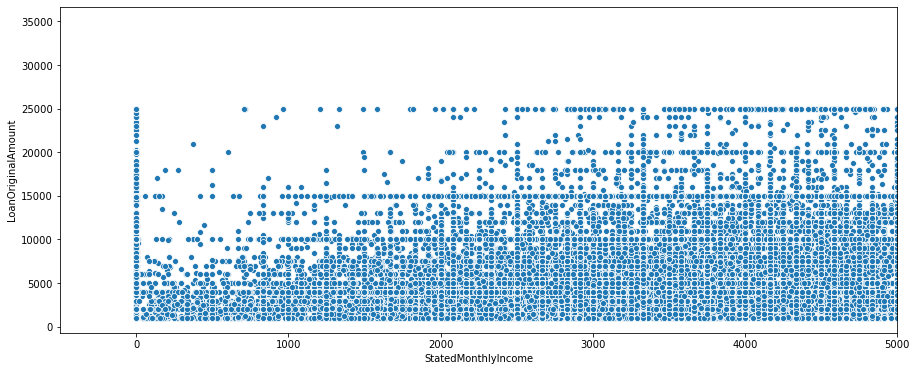

In [116]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = df['StatedMonthlyIncome'], y = df['LoanOriginalAmount']);
plt.xlim(-500, 5000)

(-500.0, 50000.0)

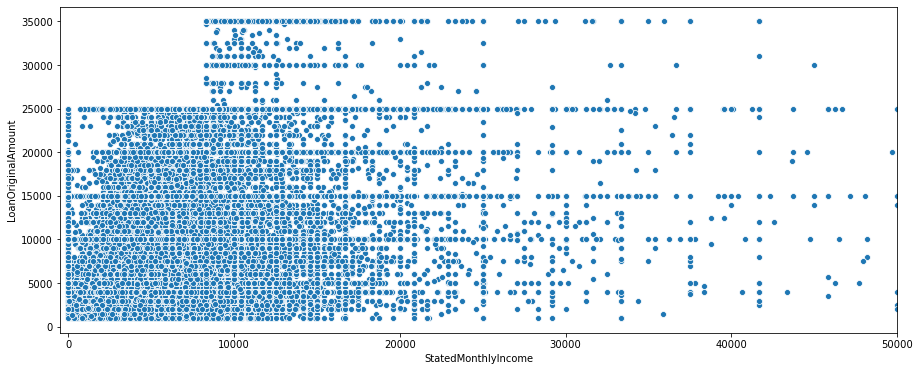

In [119]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = df['StatedMonthlyIncome'], y = df['LoanOriginalAmount']);
plt.xlim(-500, 50000)

8350 - limit for 35000 loan, below - 25000 , below 8350, normally
step , 8350 but25000 limit 700
monthly income 0 can get 25000

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text major ticklabel objects>)

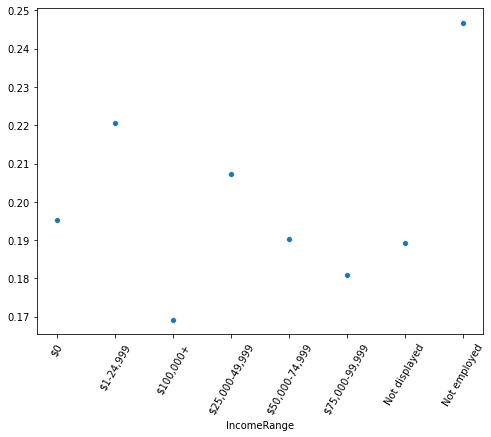

In [81]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = df_1.index, y= df_1.values);
plt.xticks(rotation=60)

In [84]:
df['EmploymentStatus'].unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [85]:
df['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [88]:
df_2 = df.groupby(['EmploymentStatus'])['BorrowerRate'].mean()

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text major ticklabel objects>)

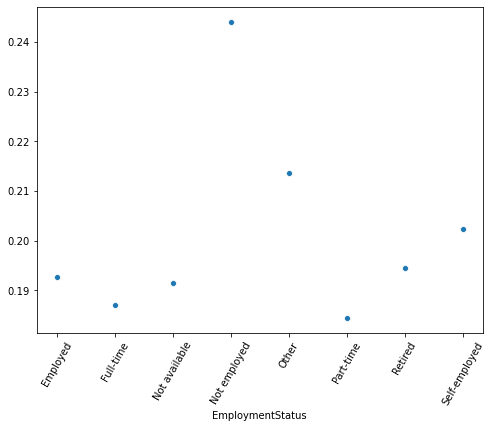

In [89]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = df_2.index, y= df_2.values);
plt.xticks(rotation=60)

# Explanatory  Data Analysis